In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X_agg = pd.read_csv('features_aggregated.csv', parse_dates=['date'])

Adding temporal features to aggregated dataset...
✅ Temporal features added

New features added:
  • day_of_year       - Day number (1-365)
  • month             - Month number (1-12)
  • season            - Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)
  • week_of_year      - Week number (1-52)
  • day_of_year_sin   - Cyclical encoding (sine)
  • day_of_year_cos   - Cyclical encoding (cosine)

Total columns now: 177

--- Temporal Features Sample ---
        date  day_of_year  month  season  week_of_year  day_of_year_sin  \
0 2025-01-08            8      1       1             2         0.137185   
1 2025-01-09            9      1       1             2         0.154204   
2 2025-01-10           10      1       1             2         0.171177   
3 2025-01-11           11      1       1             2         0.188099   
4 2025-01-12           12      1       1             2         0.204966   
5 2025-01-13           13      1       1             3         0.221772   
6 2025-01-14        

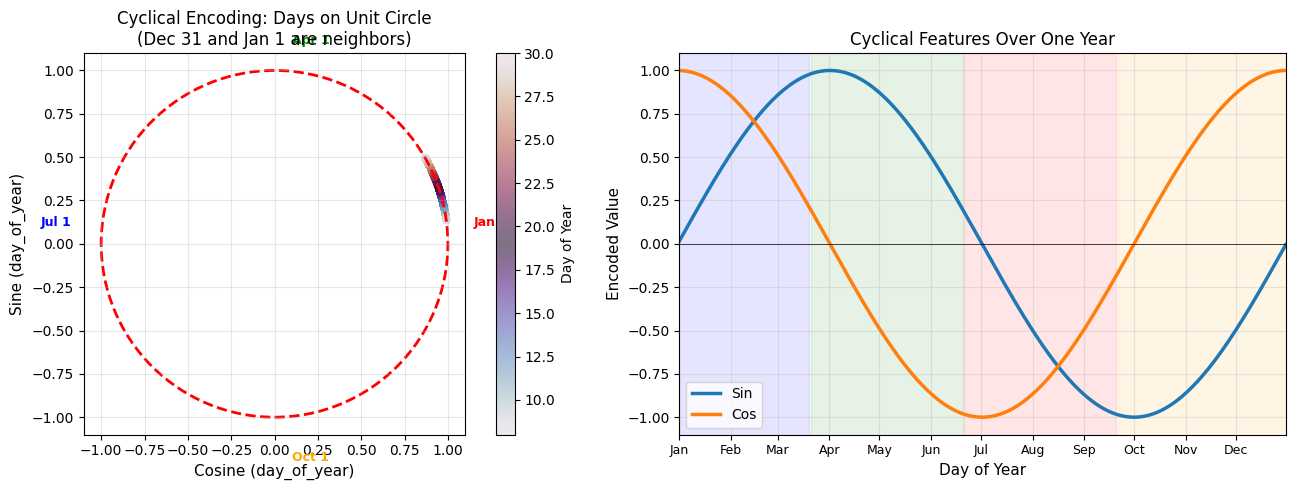


--- Your Data Coverage ---
Date range: 2025-01-08 00:00:00 to 2025-01-30 00:00:00
Day of year range: 8 to 30
Unique days: 23
Total samples: 53,820

✅ Temporal features ready for modeling!


In [8]:
# ============================================
# CELL: Add Temporal Features (FIXED VISUALIZATION)
# ============================================

def add_temporal_features(df):
    """
    Add time-based features for capturing seasonal patterns.
    Uses cyclical encoding for continuous year representation.
    """
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    
    # Basic temporal features
    df['day_of_year'] = df['date'].dt.dayofyear
    df['month'] = df['date'].dt.month
    df['season'] = (df['month'] % 12 + 3) // 3  # 1=Winter, 2=Spring, 3=Summer, 4=Fall
    df['week_of_year'] = df['date'].dt.isocalendar().week
    
    # Cyclical encoding (CRITICAL for year continuity)
    # Ensures Dec 31 and Jan 1 are recognized as neighbors
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
    
    return df

# Apply temporal features to aggregated data
print("Adding temporal features to aggregated dataset...")
X_agg = add_temporal_features(X_agg)

print(f"✅ Temporal features added")
print(f"\nNew features added:")
print("  • day_of_year       - Day number (1-365)")
print("  • month             - Month number (1-12)")
print("  • season            - Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
print("  • week_of_year      - Week number (1-52)")
print("  • day_of_year_sin   - Cyclical encoding (sine)")
print("  • day_of_year_cos   - Cyclical encoding (cosine)")

print(f"\nTotal columns now: {X_agg.shape[1]}")

# Display sample of temporal features
print("\n--- Temporal Features Sample ---")
temporal_cols = ['date', 'day_of_year', 'month', 'season', 'week_of_year', 
                 'day_of_year_sin', 'day_of_year_cos']
print(X_agg[temporal_cols].head(10))

# Visualize cyclical encoding
print("\n--- Cyclical Encoding Visualization ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Sin/Cos on unit circle
sample_days = X_agg.sample(min(1000, len(X_agg)))
scatter = axes[0].scatter(sample_days['day_of_year_cos'], 
                          sample_days['day_of_year_sin'],
                          c=sample_days['day_of_year'], 
                          cmap='twilight', 
                          alpha=0.6, 
                          s=20)
axes[0].set_xlabel('Cosine (day_of_year)', fontsize=11)
axes[0].set_ylabel('Sine (day_of_year)', fontsize=11)
axes[0].set_title('Cyclical Encoding: Days on Unit Circle\n(Dec 31 and Jan 1 are neighbors)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
circle = plt.Circle((0, 0), 1, fill=False, color='red', linestyle='--', linewidth=2)
axes[0].add_patch(circle)
plt.colorbar(scatter, ax=axes[0], label='Day of Year')

# Annotate key dates
axes[0].annotate('Jan 1', xy=(1, 0), xytext=(1.15, 0.1), 
                fontsize=9, color='red', fontweight='bold')
axes[0].annotate('Jul 1', xy=(-1, 0), xytext=(-1.35, 0.1), 
                fontsize=9, color='blue', fontweight='bold')
axes[0].annotate('Apr 1', xy=(0, 1), xytext=(0.1, 1.15), 
                fontsize=9, color='green', fontweight='bold')
axes[0].annotate('Oct 1', xy=(0, -1), xytext=(0.1, -1.25), 
                fontsize=9, color='orange', fontweight='bold')

# Plot 2: Time series of sin/cos over FULL YEAR
# Create theoretical full year if we don't have it
days_theoretical = np.arange(1, 366)
sin_theoretical = np.sin(2 * np.pi * days_theoretical / 365.25)
cos_theoretical = np.cos(2 * np.pi * days_theoretical / 365.25)

axes[1].plot(days_theoretical, sin_theoretical, label='Sin', linewidth=2.5, color='#1f77b4')
axes[1].plot(days_theoretical, cos_theoretical, label='Cos', linewidth=2.5, color='#ff7f0e')
axes[1].set_xlabel('Day of Year', fontsize=11)
axes[1].set_ylabel('Encoded Value', fontsize=11)
axes[1].set_title('Cyclical Features Over One Year', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_xlim(1, 365)
axes[1].set_ylim(-1.1, 1.1)

# Mark seasons
axes[1].axvspan(1, 79, alpha=0.1, color='blue', label='Winter')
axes[1].axvspan(80, 171, alpha=0.1, color='green')
axes[1].axvspan(172, 263, alpha=0.1, color='red')
axes[1].axvspan(264, 365, alpha=0.1, color='orange')

# Add month labels
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].set_xticks(month_starts)
axes[1].set_xticklabels(month_names, fontsize=9)

plt.tight_layout()
plt.show()

# Show actual data coverage
print("\n--- Your Data Coverage ---")
print(f"Date range: {X_agg['date'].min()} to {X_agg['date'].max()}")
print(f"Day of year range: {X_agg['day_of_year'].min()} to {X_agg['day_of_year'].max()}")
print(f"Unique days: {X_agg['day_of_year'].nunique()}")
print(f"Total samples: {len(X_agg):,}")

print("\n✅ Temporal features ready for modeling!")

In [9]:
X_agg.to_csv('features_aggregated.csv', index=False)

In [14]:
X_agg.head()

,date,latitude,longitude,t2m_min_mean,t2m_min_std,t2m_min_min,t2m_min_max,t2m_min_last,t2m_min_first,t2m_min_trend,...,skt_mean_last,skt_mean_first,skt_mean_trend,skt_mean_recent_3d,day_of_year,month,season,week_of_year,day_of_year_sin,day_of_year_cos
0,2025-01-08,20.0,-9.8,8.726366,0.632794,8.079742,9.764801,9.764801,8.079742,1.685059,...,15.349279,13.539474,1.809805,15.058328,8,1,1,2,0.137185,0.990545
1,2025-01-09,20.0,-9.8,9.049295,0.780063,8.145905,10.340241,10.340241,8.284332,2.055909,...,16.495040,13.271984,3.223056,15.519777,9,1,1,2,0.154204,0.988039
2,2025-01-10,20.0,-9.8,9.681724,1.428540,8.145905,12.711334,12.711334,8.742096,3.969238,...,16.875485,13.454448,3.421036,16.239935,10,1,1,2,0.171177,0.985240
3,2025-01-11,20.0,-9.8,9.833091,1.376133,8.145905,12.711334,9.801666,8.493073,1.308594,...,15.815525,13.461613,2.353912,16.395350,11,1,1,2,0.188099,0.982150
4,2025-01-12,20.0,-9.8,10.217961,1.323263,8.145905,12.711334,11.187164,9.574616,1.612548,...,16.328883,15.110692,1.218191,16.339964,12,1,1,2,0.204966,0.978769


In [15]:
X_agg.tail()

,date,latitude,longitude,t2m_min_mean,t2m_min_std,t2m_min_min,t2m_min_max,t2m_min_last,t2m_min_first,t2m_min_trend,...,skt_mean_last,skt_mean_first,skt_mean_trend,skt_mean_recent_3d,day_of_year,month,season,week_of_year,day_of_year_sin,day_of_year_cos
53815,2025-01-26,36.0,-1.05,15.127210,1.030787,12.846100,16.134186,15.711823,12.846100,2.865723,...,16.082421,15.610488,0.471933,16.038511,26,1,1,4,0.432499,0.901634
53816,2025-01-27,36.0,-1.05,15.591078,0.487127,14.603424,16.134186,16.093170,14.603424,1.489746,...,16.156733,15.810855,0.345878,16.109478,27,1,1,5,0.447945,0.894061
53817,2025-01-28,36.0,-1.05,15.877280,0.404261,15.291412,16.606842,16.606842,15.291412,1.315430,...,16.255029,15.919314,0.335715,16.164728,28,1,1,5,0.463258,0.886224
53818,2025-01-29,36.0,-1.05,15.958823,0.328291,15.536041,16.606842,15.862213,15.536041,0.326172,...,16.186039,15.825981,0.360058,16.199267,29,1,1,5,0.478434,0.878124
53819,2025-01-30,36.0,-1.05,15.914773,0.395809,15.227692,16.606842,15.227692,16.134186,-0.906494,...,16.028263,15.943834,0.084429,16.156444,30,1,1,5,0.493468,0.869764
